# ReRank

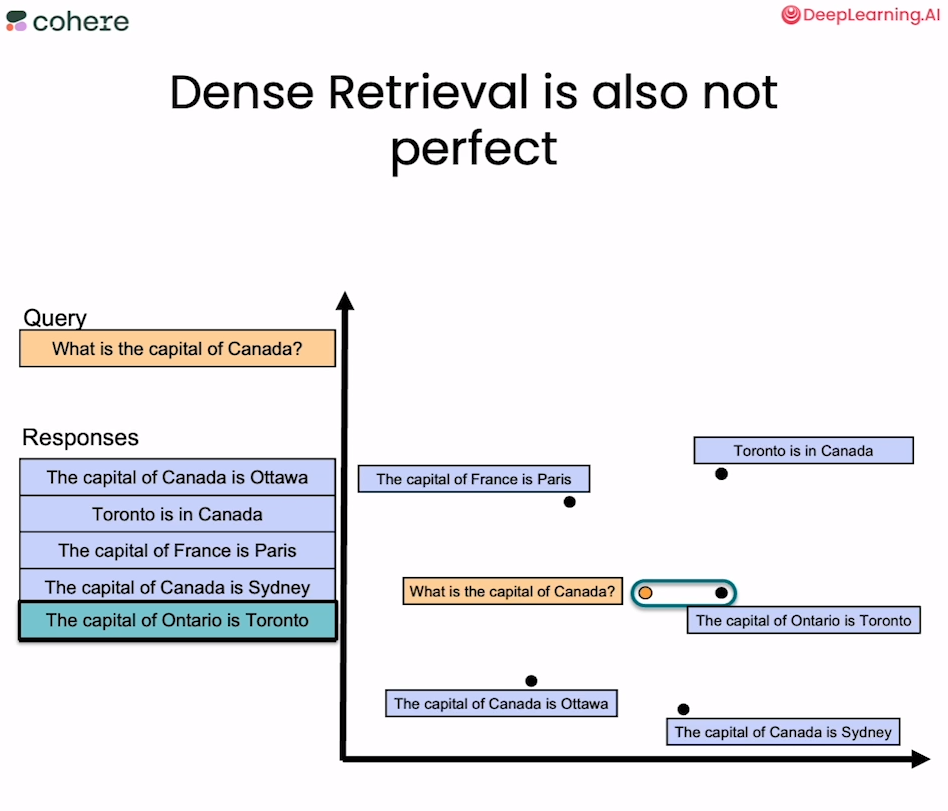

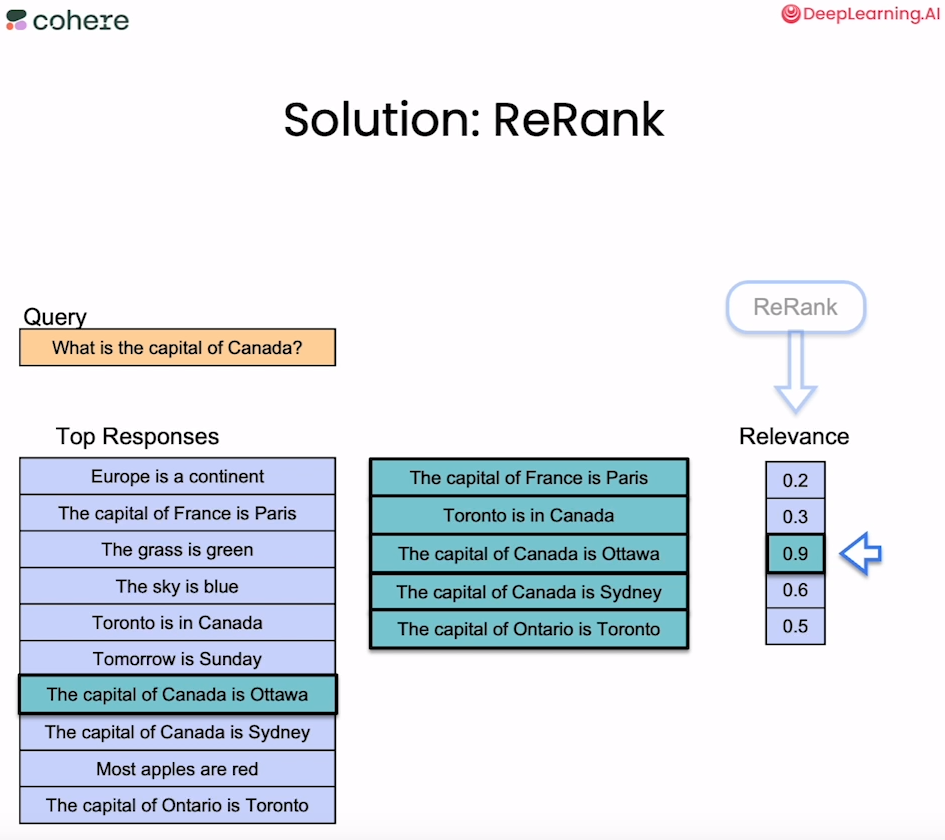

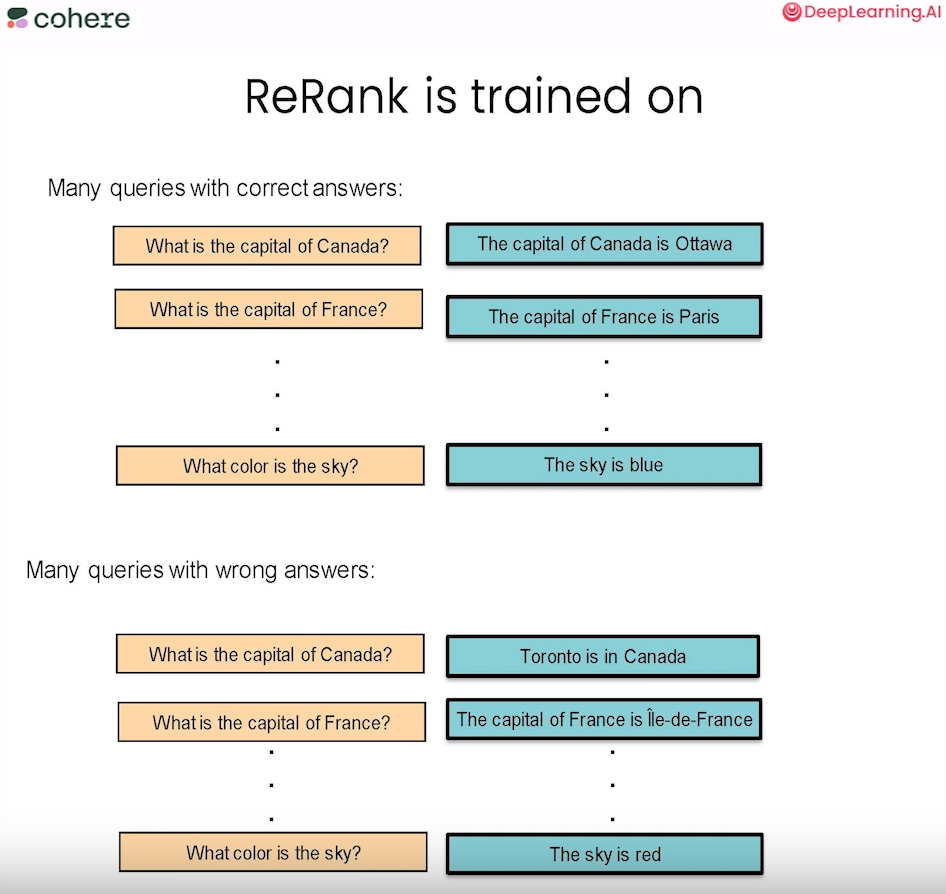

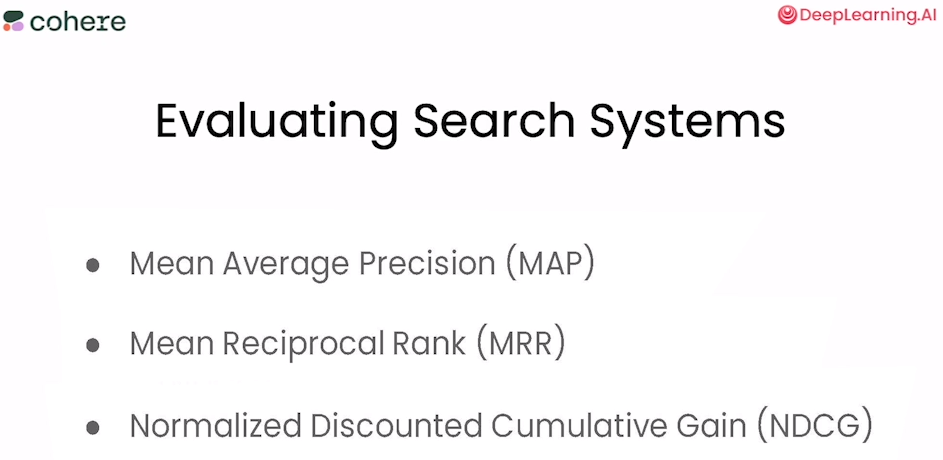

## Setup

Load needed API keys and relevant Python libaries.

In [2]:
# !pip install cohere 
# !pip install weaviate-client

In [71]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [72]:
import cohere
co = cohere.Client(os.environ['COHERE_API_KEY'])

In [73]:
import weaviate
auth_config = weaviate.auth.AuthApiKey(
    api_key=os.environ['WEAVIATE_API_KEY'])

In [74]:
client = weaviate.Client(
    url=os.environ['WEAVIATE_API_URL'],
    auth_client_secret=auth_config,
    additional_headers={
        "X-Cohere-Api-Key": os.environ['COHERE_API_KEY'],
    }
)

## Dense Retrieval

In [77]:
from utils import dense_retrieval

In [78]:
query = "What is the capital of Canada?"

In [126]:
dense_retrieval_results = dense_retrieval(query, client)

In [127]:
from utils import print_result

In [128]:
print_result(dense_retrieval_results)

item 0
_additional:{'distance': -150.8129}

lang:en

text:The governor general of the province had designated Kingston as the capital in 1841. However, the major population centres of Toronto and Montreal, as well as the former capital of Lower Canada, Quebec City, all had legislators dissatisfied with Kingston. Anglophone merchants in Quebec were the main group supportive of the Kingston arrangement. In 1842, a vote rejected Kingston as the capital, and study of potential candidates included the then-named Bytown, but that option proved less popular than Toronto or Montreal. In 1843, a report of the Executive Council recommended Montreal as the capital as a more fortifiable location and commercial centre, however, the Governor General refused to execute a move without a parliamentary vote. In 1844, the Queen's acceptance of a parliamentary vote moved the capital to Montreal.

title:Ottawa

url:https://en.wikipedia.org/wiki?curid=22219

views:2000


item 1
_additional:{'distance': -150

## Improving Keyword Search with ReRank

In [84]:
from utils import keyword_search

In [85]:
query_1 = "What is the capital of Canada?"

In [112]:
query_1 = "What is the capital of Canada?"
results = keyword_search(query_1,
                         client,
                         properties=["text", "title", "url", "views", "lang", "_additional {distance}"],
                         num_results=3
                        )

for i, result in enumerate(results):
    print(f"i:{i}")
    print(result.get('title'))
    print(result.get('text'))

i:0
Monarchy of Canada
i:1
Early modern period
i:2
Flag of Canada
i:3
Flag of Canada
i:4
Prime Minister of Canada
i:5
Hamilton, Ontario
i:6
Liberal Party of Canada
i:7
Stephen Harper
i:8
Monarchy of Canada
i:9
Flag of Canada
i:10
Order of Canada
i:11
University of Toronto
i:12
Newfoundland (island)
i:13
Liberal Party of Canada
i:14
Newfoundland (island)
i:15
Flag of Canada
i:16
North American Free Trade Agreement
i:17
Pea
i:18
Monarchy of Canada
i:19
Prime Minister of Canada
i:20
Hamilton, Ontario
i:21
Aesop's Fables
i:22
Revolutions of 1989
i:23
R.S.C. Anderlecht
i:24
Hudson's Bay Company
i:25
Liberal Party of Canada
i:26
2020–21 NBA season
i:27
Filibuster
i:28
Hardcore punk
i:29
Early modern period
i:30
Skopje
i:31
Venture capital
i:32
Wakanda
i:33
Arjuna
i:34
Luhansk
i:35
Arlington National Cemetery
i:36
North American Free Trade Agreement
i:37
Global North and Global South
i:38
Shia–Sunni relations
i:39
Jacob Zuma
i:40
Early modern period
i:41
Maui
i:42
Gerhard Schröder
i:43
Revolu

In [ ]:
query_1 = "What is the capital of Canada?"
results = keyword_search(query_1,
                         client,
                         properties=["text", "title", "url", "views", "lang", "_additional {distance}"],
                         num_results=500
                        )

for i, result in enumerate(results):
    print(f"i:{i}")
    print(result.get('title'))
    #print(result.get('text'))

In [113]:
def rerank_responses(query, responses, num_responses=10):
    reranked_responses = co.rerank(
        model = 'rerank-english-v2.0',
        query = query,
        documents = responses,
        top_n = num_responses,
        )
    return reranked_responses

In [114]:
texts = [result.get('text') for result in results]
reranked_text = rerank_responses(query_1, texts)

In [115]:
for i, rerank_result in enumerate(reranked_text):
    print(f"i:{i}")
    print(f"{rerank_result}")
    print()

i:0
RerankResult<document['text']: Selection of Ottawa as the capital of Canada predates the Confederation of Canada. The selection was contentious and not straightforward, with the parliament of the United Province of Canada holding more than 200 votes over several decades to attempt to settle on a legislative solution to the location of the capital., index: 407, relevance_score: 0.9875684>

i:1
RerankResult<document['text']: Montreal was the capital of the Province of Canada from 1844 to 1849, but lost its status when a Tory mob burnt down the Parliament building to protest the passage of the Rebellion Losses Bill. Thereafter, the capital rotated between Quebec City and Toronto until in 1857, Queen Victoria herself established Ottawa as the capital due to strategic reasons. The reasons were twofold. First, because it was located more in the interior of the Province of Canada, it was less susceptible to attack from the United States. Second, and perhaps more importantly, because it la

## Improving Dense Retrieval with ReRank

In [116]:
from utils import dense_retrieval

In [117]:
query_2 = "Who is the tallest person in history?"

In [130]:
results = dense_retrieval(query_2,client)

In [132]:
for i, result in enumerate(results):
    print(f"i:{i}")
    print(result.get('title'))
    print(result.get('text'))
    print()

i:0
Robert Wadlow

i:1
Manute Bol

i:2
Sultan Kösen

i:3
Sultan Kösen

i:4
Netherlands

i:5
Robert Wadlow

i:6
Randy Johnson

i:7
Manute Bol

i:8
Harald Hardrada

i:9
Manute Bol



In [121]:
texts = [result.get('text') for result in results]
reranked_text = rerank_responses(query_2, texts)

In [122]:
for i, rerank_result in enumerate(reranked_text):
    print(f"i:{i}")
    print(f"{rerank_result}")
    print()

i:0
RerankResult<document['text']: Robert Pershing Wadlow (February 22, 1918 July 15, 1940), also known as the Alton Giant and the Giant of Illinois, was a man who was the tallest person in recorded history for whom there is irrefutable evidence. He was born and raised in Alton, Illinois, a small city near St. Louis, Missouri., index: 0, relevance_score: 0.9734939>

i:1
RerankResult<document['text']: Sultan Kösen (born 10 December 1982) is a Turkish farmer who holds the Guinness World Record for tallest living male at . Of Kurdish ethnicity, he is the seventh tallest man in history., index: 2, relevance_score: 0.8664718>

i:2
RerankResult<document['text']: The Dutch are the tallest people in the world, by nationality, with an average height of for adult males and for adult females in 2009. The average height of young males in the Netherlands increased from 5 feet, 4 inches to approximately 6 feet between the 1850s until the early 2000s. People in the south are on average about shorter 